In [ ]:
#import libraries
import scipy as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
nYear = 7
n = nYear +1
sales0 = 50 #Expected value of sales for 2020 i.e. t=1
salesgrowth0=0.07 #Expected Sales growth rate
gross_profit_margin=0.3 #Expected COGS and operating expenses as a % of sales
capex0=15#Expected value of CAPEX at t=0
nwc0= 4
taxrate =0.30 #Expected tax rate is 25%
discountrate = 0.22 #Expected discount rate is 10%
gcapex= 0.27 #Expected Growth in Capex
gnwc = 0.13 
dep_rate = 0.25 #Depriciation %age
int_coverage0 = 8
dec_int_coverage = 0.025
cost_of_debt = 0.095
operating_expenses_ratio = 0.17

In [ ]:
#Solving for Base Case scenario
# Sales Calculation
sales = list(range(n))
sales[0]=0
for i in sp.arange(nYear):
  sales[1] = sales0
  sales[i+1]=(1+salesgrowth0)*sales[i]
print("Sales Revenue", sales[:n])

# COGS and Operating Expenses Calculation
COGS = sp.ones(n)*(1-gross_profit_margin)*sales
operating_expenses = sp.ones(n)*operating_expenses_ratio*sales[0:n]
print("COGS", COGS[:n])
print("Operating expenses", operating_expenses[:n])

# Gross PPE and Net Working Capital Calculation
grossppe = sp.ones(n)
grossppe[0]=capex0
wc = sp.ones(n)
wc[0]=nwc0
for i in sp.arange(nYear-1):
  grossppe[i+1]=grossppe[i]+gcapex*(sales[i+2]-sales[i+1])
  wc[i+1]=wc[i]+gnwc*(sales[i+2]-sales[i+1])

grossppe[nYear]=grossppe[nYear-1]
print("Gross PPE", grossppe[0:n])
wc[nYear]=wc[nYear-1]
print("Net Working Capital", wc[0:n])

# Depreciation, Net PPE ,Accumulated Depreciation Calculation
depreciation = sp.zeros(n)
acc_depreciation = sp.zeros(n)
net_ppe = sp.zeros(n)
net_ppe[0] = capex0
for i in sp.arange(1,n):
  depreciation[i] = dep_rate * net_ppe[i-1]
  acc_depreciation[i] = acc_depreciation[i-1] + depreciation[i]
  net_ppe[i] = grossppe[i]-acc_depreciation[i]
print("Depreciation",depreciation[:n])
print("Accumulated_Depreciation",acc_depreciation[:n])
print("Net PPE",net_ppe[:n])


# EBIT Projection
gross_profit = sales - COGS
EBITDA = gross_profit - operating_expenses
print("EBITDA",EBITDA[:n])
EBIT = EBITDA - depreciation
print("EBIT",EBIT[:n])

# Interest coverage Calculations
int_coverage_ratio = sp.zeros(n)
int_expense = sp.zeros(n)
for i in sp.arange(1,n):
  int_coverage_ratio[i] = int_coverage_ratio[i-1] * (1-dec_int_coverage)
  int_coverage_ratio[1] = int_coverage0
  int_expense[i] = EBIT[i] / int_coverage_ratio[i]
print("Interest Coverage Ratio",int_coverage_ratio[:n])
print("Interst Expense",int_expense[:n])
print("int_coverage_ratio",int_coverage_ratio[:n])

# Net Profit Projections
EBT = EBIT - int_expense
netprofit=EBT*(1-taxrate)
print("Net Profit", netprofit[:n])

# Capex Projections
change_in_capex = sp.zeros(n)
change_in_capex[0] = grossppe[0]
change_in_nwc = sp.zeros(n)
change_in_nwc[0] =  wc[0]
for i in sp.arange(1,nYear):
  change_in_capex[i] = grossppe[i]-grossppe[i-1]
  change_in_nwc[i] = wc[i]-wc[i-1]
print("CAPEX", change_in_capex[:n])
print("Change in Net Working Capital", change_in_nwc[:n])

# Net proceeds to Debt Projection
# Assumption:Company pays off entire principal amount as the project ends
debt = sp.zeros(n)
np_p = sp.zeros(n)
for i in sp.arange(nYear):
  debt[i] = int_expense[i+1]/cost_of_debt
for i in sp.arange(1,n):
  np_p[i] = debt[i] - debt[i-1]
np_p[0] = debt[0]
print("Debt",debt[:n])
print("NP-P",np_p[:n])

# Salvage Value 
salvage_value = sp.zeros(n)
salvage_value[nYear] = net_ppe[nYear] + wc[nYear]
print("Salvage Value",salvage_value[:n])


# FCFE Calculation
FCFF = netprofit + depreciation - change_in_capex-change_in_nwc+np_p + salvage_value
print("FCFF", FCFF[:n])
NPVproject =sp.npv(discountrate,FCFF)
IRRproject = sp.irr(FCFF)
print("Expected NPV", NPVproject)
print("Expected IRR", IRRproject)

Sales Revenue [0, 50, 53.5, 57.245000000000005, 61.25215000000001, 65.53980050000001, 70.12758653500002, 75.03651759245002]
COGS [ 0.         35.         37.45       40.0715     42.876505   45.87786035
 49.08931057 52.52556231]
Operating expenses [ 0.          8.5         9.095       9.73165    10.4128655  11.14176609
 11.92168971 12.75620799]
Gross PPE [15.         15.945      16.95615    18.0380805  19.19574614 20.43444836
 21.75985975 21.75985975]
Net Working Capital [4.         4.455      4.94185    5.4627795  6.02017407 6.61658625
 7.25474729 7.25474729]
Depreciation [0.         3.75       3.04875    2.53935    2.17499513 1.92066275
 1.75017262 1.64398231]
Accumulated_Depreciation [ 0.          3.75        6.79875     9.3381     11.51309513 13.43375788
 15.1839305  16.82791281]
Net PPE [15.         12.195      10.1574      8.6999805   7.68265101  7.00069049
  6.57592925  4.93194694]
EBITDA [0.         6.5        6.955      7.44185    7.9627795  8.52017407
 9.11658625 9.75474729]
E

II. Monte Carlo Simulation for Capital Budgeting

In [ ]:
nYear = 7
n = nYear +1
sp.random.seed(123)
nSimulation = 100 #No. of simulations
n2 = nSimulation #For ease of writing
sales0 = sp.random.normal(loc=50,scale=10,size=n2)
salesgrowth0 = sp.random.normal(loc=7,scale=3,size=n2)
gross_profit_margin = sp.random.uniform(low=0.15,high=0.60,size=n2)
capex0=sp.random.uniform(low=13,high=17,size=n2)
nwc0= sp.random.uniform(low=2,high=6,size=n2)
taxrate =0.30
discountrate = sp.random.triangular(left=0.2, mode=0.22, right=0.25,size=n2)
gcapex= sp.random.uniform(low=0.15,high=0.45,size=n2)
gnwc = sp.random.uniform(low=0.05,high=0.2,size=n2)
dep_rate = 0.25
int_coverage0 = 8
dec_int_coverage = 0.025
cost_of_debt = 0.095
operating_expenses_ratio = sp.random.triangular(left=0.1, mode=0.17, right=0.3,size=n2)
np_p0 = sp.random.uniform(low=2,high=5,size=n2)

NPV [-697624.9803979973, 390.7680102405491, 2622393.3030785467, -27683625.044783365, -75362.01258979714, 1049601.492179701, -160556.22875175017, 512.0898089415806, -2062164.6578485738, -615.5117847034222, 183966.8303820963, -2314557.674965584, -140175.44388284345, 117413.88098430132, 4082134.967299219, -274678.01173985854, 14942.57071445116, 368989.98396835255, -6731905.761951805, 32.01990707850115, 298760.49930246494, -48842.79036797135, -914716.8954888934, 4644881.73214317, 5726797.353065573, 268431.45127438015, -5127230.858789734, -1401517.1550920748, 403604.43007903534, -258769.82818076044, 55271.259782607485, -12596.324499597144, -276.0551202859799, -1190460.6785330055, -3630441.0235808846, -539131.7313471441, -103234.54849760018, 1642695.1997179405, 329071.97482079745, 43820.44023733796, -90389.53548594736, -91340.08815205583, 3681293.2217255286, -739568.2113576595, 116293.05347115088, -60984.837660990626, 462390.970997136, -12426836.183493031, 224217.65408394442, -1145311.739922

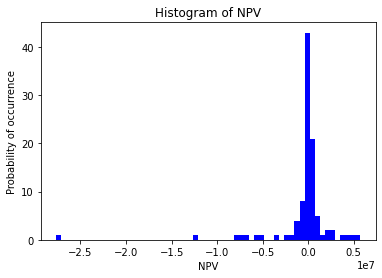

In [ ]:
# Running Monte Carlo Simulations

npv=[]
irr=[]
for j in sp.arange(nSimulation):
  sales = list(range(n))
  sales[0]=0
  for i in sp.arange(nYear):
    sales[1] = sales0[j]
    sales[i+1]=(1+salesgrowth0[j])*sales[i]

  # COGS and Operating Expenses Calculation
  COGS = sp.ones(n)*(1-gross_profit_margin[j])*sales
  operating_expenses = sp.ones(n)*operating_expenses_ratio[j]*sales[0:n]

  # Gross PPE and Net Working Capital Calculation
  grossppe = sp.ones(n)
  grossppe[0]=capex0[j]
  wc = sp.ones(n)
  wc[0]=nwc0[j]
  for i in sp.arange(nYear-1):
    grossppe[i+1]=grossppe[i]+gcapex[j]*(sales[i+2]-sales[i+1])
    wc[i+1]=wc[i]+gnwc[j]*(sales[i+2]-sales[i+1])
  grossppe[nYear]=grossppe[nYear-1]
  wc[nYear]=wc[nYear-1]

  # Depreciation, Net PPE ,Accumulated Depreciation Calculation
  depreciation = sp.zeros(n)
  acc_depreciation = sp.zeros(n)
  net_ppe = sp.zeros(n)
  net_ppe[0] = capex0[j]
  for i in sp.arange(1,n):
    depreciation[i] = dep_rate * net_ppe[i-1]
    acc_depreciation[i] = acc_depreciation[i-1] + depreciation[i]
    net_ppe[i] = grossppe[i]-acc_depreciation[i]


  # EBIT Projection
  gross_profit = sales - COGS
  EBITDA = gross_profit - operating_expenses
  EBIT = EBITDA - depreciation

  # Interest coverage Calculations
  int_coverage_ratio = sp.zeros(n)
  int_expense = sp.zeros(n)
  for i in sp.arange(1,n):
    int_coverage_ratio[i] = int_coverage_ratio[i-1] * (1-dec_int_coverage)
    int_coverage_ratio[1] = int_coverage0
    int_expense[i] = EBIT[i] / int_coverage_ratio[i]

  # Net Profit Projections
  EBT = EBIT - int_expense
  netprofit=EBT*(1-taxrate)

  # Capex Projections
  change_in_capex = sp.zeros(n)
  change_in_capex[0] = grossppe[0]
  change_in_nwc = sp.zeros(n)
  change_in_nwc[0] =  wc[0]
  for i in sp.arange(1,nYear):
    change_in_capex[i] = grossppe[i]-grossppe[i-1]
    change_in_nwc[i] = wc[i]-wc[i-1]

  # Net proceeds to Debt Projection
  # Assumption:Company pays off entire principal amount as the project ends
  debt = sp.zeros(n)
  np_p = sp.zeros(n)
  for i in sp.arange(nYear):
    debt[i] = int_expense[i+1]/cost_of_debt
  for i in sp.arange(1,n):
    np_p[i] = debt[i] - debt[i-1]
  np_p[0] = np_p0[j]

  # Salvage Value 
  salvage_value = sp.zeros(n)
  salvage_value[nYear] = net_ppe[nYear] + wc[nYear]

  # FCFE Calculation
  FCFF = netprofit + depreciation - change_in_capex-change_in_nwc+np_p + salvage_value
  # print("FCFF", FCFF[:n])
  NPVproject =sp.npv(discountrate[j],FCFF)
  IRRproject = sp.irr(FCFF)
  npv.append(NPVproject)
  irr.append(IRRproject) 
print("NPV",npv)     
print("Mean NPV", round(sp.mean(npv),0)) 
print("Standard deviation NPV", sp.std(npv)) 
print("50th percentile NPV", round(sp.percentile(npv,50),0))
for i in range(10,100,10):
  print("percentile", i)
  print(round(sp.percentile(npv,i),2))
plt.hist(npv,60,facecolor='blue',align='mid')
plt.xlabel('NPV')
plt.ylabel('Probability of occurrence')
plt.title('Histogram of NPV')
plt.show()

Mean IRR 1.62
percentile 10
-0.11
percentile 20
-0.06
percentile 30
0.01
percentile 40
0.12
percentile 50
0.26
percentile 60
0.42
percentile 70
1.09
percentile 80
2.72
percentile 90
5.97


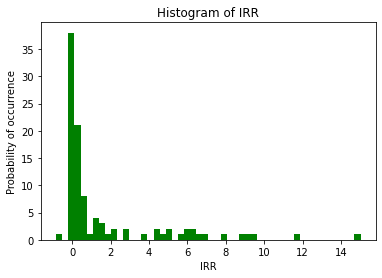

In [ ]:
print("Mean IRR", round(sp.mean(irr),2))
for i in range(10,100,10):
  print("percentile", i)
  print(round(sp.percentile(irr,i),2))
plt.hist(irr,50,facecolor='green',align='mid')
plt.xlabel('IRR')
plt.ylabel('Probability of occurrence')
plt.title('Histogram of IRR')
plt.show()